# Cancer classification 
# Breast Cnacer Prediction
# Python coder: Reza Zamani

## This project has two sections:
## 1- Analysing the cancer cell with SVM 
## 2- Comparison of SVM performance with decision trees, logistic regression and KNN 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
import time

In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

# Section One- analysing the best model for SVM

In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1-Baseline for Classifier
#### Dummycalssifier 

In [7]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print(baseline_score)

0.6228070175438597


### 2- Default Settings with SVC

In [8]:
svc = SVC().fit(X_train, y_train)
svc_defaults = svc.score(X_test, y_test)
print(svc_defaults)

0.9824561403508771


In [9]:
# Make predictions
y_pred = svc.predict(X_test)

In [10]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[41  2]
 [ 0 71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### 3- Grid Searching with SVC


In [11]:
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, .5, 1.0, 5, 10, 50 ,100],}

In [12]:
grid = GridSearchCV(svc, param_grid=params).fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)
print(grid_score)

0.956140350877193


In [13]:
cv_score_test = cross_val_score(grid, X_test, y_test, cv=5).mean()
print(cv_score_test)

0.9304347826086957


### 4- Optimal Kernel Function

In [14]:
results = grid.cv_results_
results=pd.DataFrame (results)
print (results);

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_gamma  \
0        0.005997      0.007373         0.005599        0.006858          0.1   
1        0.005601      0.006860         0.002800        0.005599          0.1   
2        0.005600      0.006858         0.000000        0.000000          0.1   
3        0.000814      0.001628         0.005600        0.006858          0.1   
4        0.011643      0.003448         0.008456        0.004301          0.5   
5        0.003640      0.003690         0.002020        0.003111          0.5   
6        0.003217      0.003941         0.000829        0.001015          0.5   
7        0.004465      0.004683         0.003222        0.003946          0.5   
8        0.015787      0.003939         0.006483        0.003695          1.0   
9        0.000000      0.000000         0.004803        0.006018          1.0   
10       0.008399      0.006858         0.000000        0.000000          1.0   
11       0.005600      0.006

In [15]:
print (results[['params', 'mean_test_score','rank_test_score']])

                                 params  mean_test_score  rank_test_score
0       {'gamma': 0.1, 'kernel': 'rbf'}         0.962637                8
1      {'gamma': 0.1, 'kernel': 'poly'}         0.956044                9
2    {'gamma': 0.1, 'kernel': 'linear'}         0.969231                1
3   {'gamma': 0.1, 'kernel': 'sigmoid'}         0.912088               16
4       {'gamma': 0.5, 'kernel': 'rbf'}         0.786813               23
5      {'gamma': 0.5, 'kernel': 'poly'}         0.949451               10
6    {'gamma': 0.5, 'kernel': 'linear'}         0.969231                1
7   {'gamma': 0.5, 'kernel': 'sigmoid'}         0.857143               22
8       {'gamma': 1.0, 'kernel': 'rbf'}         0.628571               24
9      {'gamma': 1.0, 'kernel': 'poly'}         0.949451               10
10   {'gamma': 1.0, 'kernel': 'linear'}         0.969231                1
11  {'gamma': 1.0, 'kernel': 'sigmoid'}         0.868132               19
12        {'gamma': 5, 'kernel': 'rbf'

In [16]:
best_kernel = grid.best_params_
print(best_kernel)

{'gamma': 0.1, 'kernel': 'linear'}


### 5- apply the best model 

In [17]:
svc = SVC(gamma= 0.1, kernel = 'linear').fit(X_train, y_train)
svc_defaults = svc.score(X_test, y_test)
print(svc_defaults)

0.956140350877193


In [18]:
# Make predictions
y_pred = svc.predict(X_test)

In [19]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[41  2]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### 6-use PCA to reduce dimensions 

In [20]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [21]:
#myself
X_train_pca[:,0]

array([ 4.24490333e+00,  9.05375518e+00, -2.27537401e+00, -2.51045303e+00,
       -2.30284792e+00,  4.13994739e+00,  2.99560854e+00, -3.21149460e+00,
       -2.37592825e+00,  3.38983726e+00, -8.93881293e-01,  4.33032435e+00,
        3.18617027e+00, -2.63966718e+00, -3.11866687e+00,  5.00491144e+00,
        9.21099216e+00,  5.97157908e+00, -2.78508674e+00, -3.28557710e+00,
       -2.05551632e+00,  4.78576830e+00, -4.50204054e-01, -2.18628605e+00,
        1.27513923e+00,  1.32979815e+00, -2.85993246e+00,  4.93834065e+00,
       -3.59004836e+00, -4.31497473e+00,  2.29180069e+00, -1.99968226e+00,
        3.27682472e+00,  4.77455385e+00, -3.57269934e-01, -3.45519079e+00,
       -6.46788864e-01, -3.62187750e+00, -4.52509275e+00, -1.92329317e+00,
       -3.99839098e+00,  1.30319614e+01,  3.82808948e+00, -5.44546992e+00,
       -2.17907844e+00, -4.62696322e+00, -5.49891065e+00, -1.90897199e+00,
       -3.82695705e+00, -9.90639363e-01, -9.07588744e-01, -1.26055857e+00,
       -3.21690737e+00, -

In [22]:
# Train the SVM model
svm_model = SVC(kernel='linear', C=.1, gamma='scale', random_state=42)
svm_model.fit(X_train_pca, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [23]:
# Make predictions
y_pred = svm_model.predict(X_test_pca)

In [24]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[42  1]
 [ 0 71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [25]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f'SVM,  Decision Boundary with PCA=2')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show();


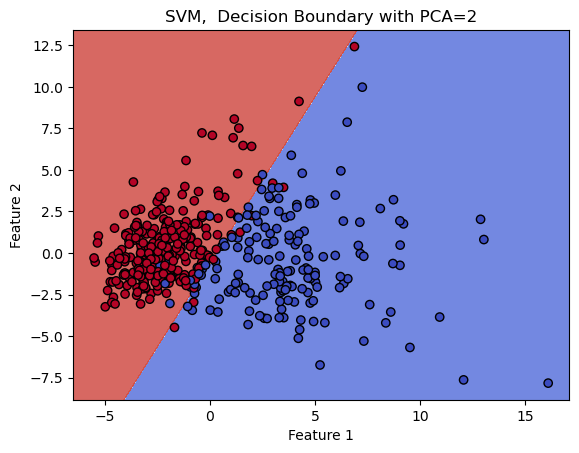

In [26]:
# Visualize the training data and decision boundary
plot_decision_boundary(X_train_pca, y_train, svm_model)

# Section two- comparison of Algorithms 

In [27]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [28]:
print (X.shape, y.shape)

(569, 30) (569,)


In [29]:
y.nunique

<bound method IndexOpsMixin.nunique of 0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32>

In [30]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [32]:
X.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

In [33]:
X['Cancer']=y

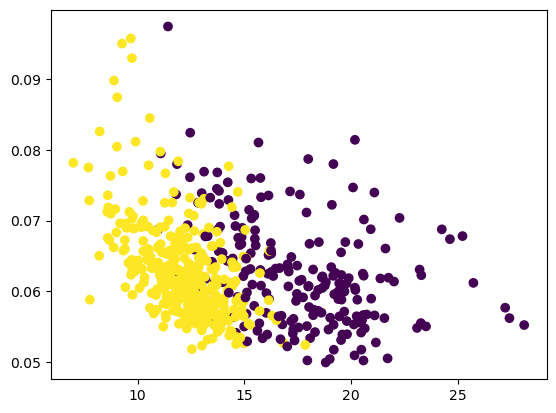

In [34]:
plt.scatter (X['mean radius'], X['mean fractal dimension'], c = X['Cancer'] )

<Axes: xlabel='mean radius', ylabel='mean fractal dimension'>

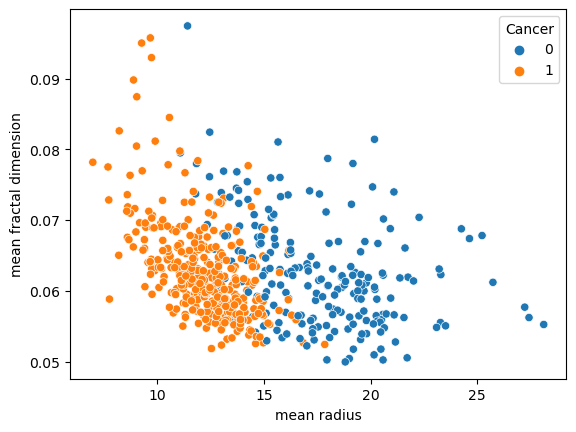

In [35]:
sns.scatterplot (data= X, x= 'mean radius', y= 'mean fractal dimension', hue= 'Cancer')

In [36]:
# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()


# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)



In [37]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Define the models and hyperparameters
models = {
    'KNN': (KNeighborsClassifier(), {'KNN__n_neighbors': [3, 5, 7]}),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'Logistic Regression__C': [0.1, 1, 10]}),
    'SVC': (SVC(), {'SVC__C': [0.1, 1, 10], 'SVC__kernel': ['linear', 'rbf']}),
    'Decision Trees': (DecisionTreeClassifier(), {'Decision Trees__max_depth': [5, 10, 15]})
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []
bestmodel= []
for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    bestmodel.append (best_model)
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    
    # Append the results
    results.append([name, train_score, test_score, fit_time])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Score', 'Test Score', 'Average Fit Time'])
results_df.set_index('Model', inplace=True)

# Save to JSON (for submission if needed)
results_df.to_json('data/model_results.json')

df = pd.read_json(r'data/model_results.json')
df

,Train Score,Test Score,Average Fit Time
KNN,0.980220,0.947368,2.015056
Logistic Regression,0.986813,0.973684,0.053386
SVC,0.982418,0.982456,0.040264
Decision Trees,0.995604,0.938596,0.047987


In [38]:
bestmodel

[Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['mean radius',
                                                    'mean texture',
                                                    'mean perimeter',
                                                    'mean area',
                                                    'mean smoothness',
                                                    'mean compactness',
                                                    'mean concavity',
                                                    'mean concave points',
                                                    'mean symmetry',
                                                    'mean fractal dimension',
                                                    'radius error',
                                                    'texture error',
                                                

### With attention to bestmode, the best tuning for each model is: 
#### ('KNN', KNeighborsClassifier())
#### ('Logistic Regression',LogisticRegression(C=1, max_iter=1000))
#### ('SVC', SVC(C=0.1, kernel='linear'))
#### ('Decision Trees', DecisionTreeClassifier(max_depth=5))

In [43]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f' Best {model} for cancer prediction', fontsize =15 )
    plt.xlabel("Feature 1",  fontsize =15)
    plt.ylabel("Feature 2",  fontsize =15)
    plt.show();

### SVC decision boundary 

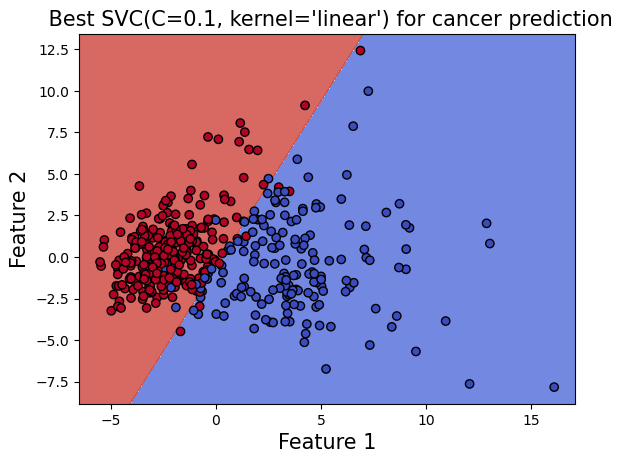

In [44]:
svm_best_model = SVC(kernel='linear',  C=.1, gamma='scale')
svm_best_model.fit(X_train_pca, y_train)

# Make predictions
y_pred = svm_best_model.predict(X_test_pca)

# Visualize the training data and decision boundary
plot_decision_boundary(X_train_pca, y_train, svm_best_model) 

### KNN decision boundary 

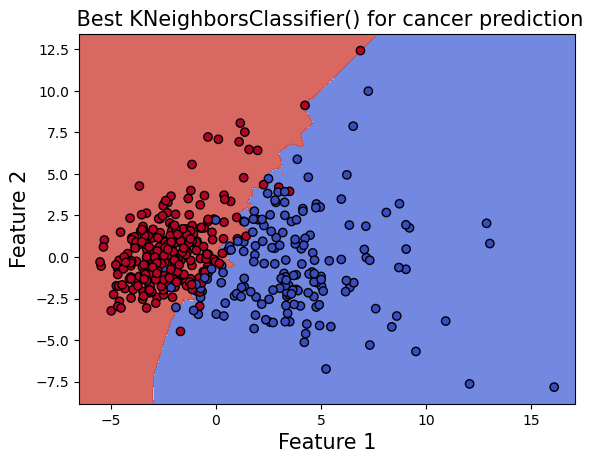

In [47]:
knn_best_model = KNeighborsClassifier(n_neighbors=5)
knn_best_model.fit(X_train_pca, y_train)

# Make predictions
y_pred = knn_best_model.predict(X_test_pca)

# Visualize the training data and decision boundary
plot_decision_boundary(X_train_pca, y_train, knn_best_model) 

### Logistic Regression decision boundary 

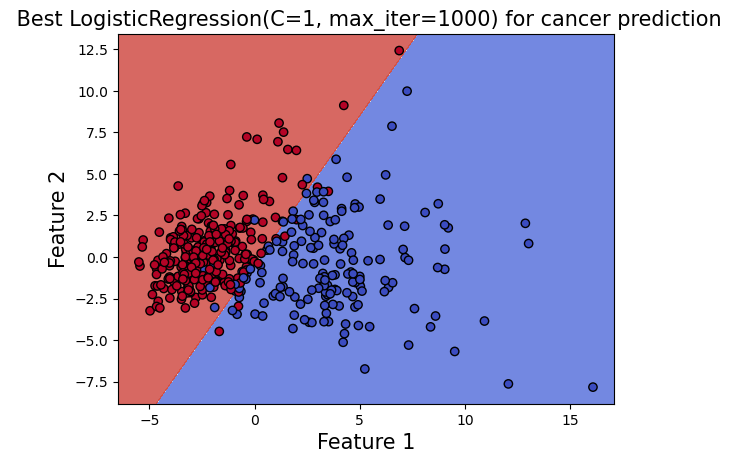

In [45]:
lg_best_model = LogisticRegression(C=1, max_iter=1000)
lg_best_model.fit(X_train_pca, y_train)

# Make predictions
y_pred = lg_best_model.predict(X_test_pca)

# Visualize the training data and decision boundary
plot_decision_boundary(X_train_pca, y_train, lg_best_model) 

### Decision Trees decision boundary 

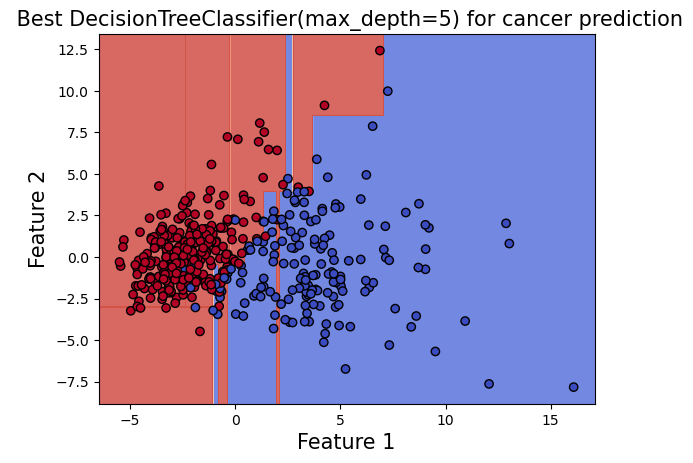

In [46]:
dt_best_model =  DecisionTreeClassifier(max_depth=5)
dt_best_model.fit(X_train_pca, y_train)

# Make predictions
y_pred = dt_best_model.predict(X_test_pca)

# Visualize the training data and decision boundary
plot_decision_boundary(X_train_pca, y_train, dt_best_model) 